In [8]:
!pip install seaborn


In [48]:
import pandas as pd
import matplotlib.pyplot as plt


economic_data = pd.read_csv('economics.csv')


economic_data['GDP'] = economic_data['GDP'].replace('[\$,]', '', regex=True).astype(float)
economic_data['Population'] = economic_data['Population'].replace('[\$,]', '', regex=True).astype(float)
economic_data['GDP_per_capita'] = economic_data['GDP'] / economic_data['Population']


economic_data['GDP_per_capita'] = round(economic_data['GDP_per_capita'], 2)


print("GDP per Capita Categories:")
gdp_bins = pd.cut(economic_data['GDP_per_capita'], bins=25, precision=2)
gdp_counts = gdp_bins.value_counts()
gdp_counts = gdp_counts[gdp_counts != 0]
print(gdp_counts)

chess_data = pd.read_csv('chess.csv')

merged_data = pd.merge(chess_data, economic_data, left_on='country', right_on='Country', how='left')

top_1000_players = merged_data.nlargest(199999, 'rate')

top_countries = top_1000_players['country'].value_counts()
print("\nTop Countries of Top 200000 Players:")
print(top_countries)

country_counts = {}
for country in top_1000_players['country']:
    country_counts[country] = country_counts.get(country, 0) + 1

country_counts_series = pd.Series(country_counts)

merged_data['GDP_per_capita_bins'] = pd.cut(merged_data['GDP_per_capita'], bins=5)

average_grandmasters_per_capita = merged_data.groupby('GDP_per_capita_bins')['rate'].mean()



GDP per Capita Categories:
GDP_per_capita
(77.11, 7626.68]          107
(7626.68, 14992.11]        30
(14992.11, 22357.54]       16
(22357.54, 29722.97]        8
(37088.4, 44453.83]         8
(44453.83, 51819.26]        7
(29722.97, 37088.4]         4
(59184.69, 66550.12]        4
(51819.26, 59184.69]        2
(73915.55, 81280.98]        2
(169666.13, 177031.56]      1
(103377.26, 110742.69]      1
(177031.56, 184396.99]      1
(81280.98, 88646.41]        1
(66550.12, 73915.55]        1
Name: count, dtype: int64

Top Countries of Top 200000 Players:
country
United States    25651
India            12269
Russia            9430
Philippines       8698
Germany           7298
                 ...  
Guinea-Bissau        7
Benin                7
South Georgia        7
Dominica             7
The Gambia           6
Name: count, Length: 210, dtype: int64


C:\Users\david\AppData\Local\Temp\ipykernel_24240\3785967766.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_grandmasters_per_capita = merged_data.groupby('GDP_per_capita_bins')['rate'].mean()


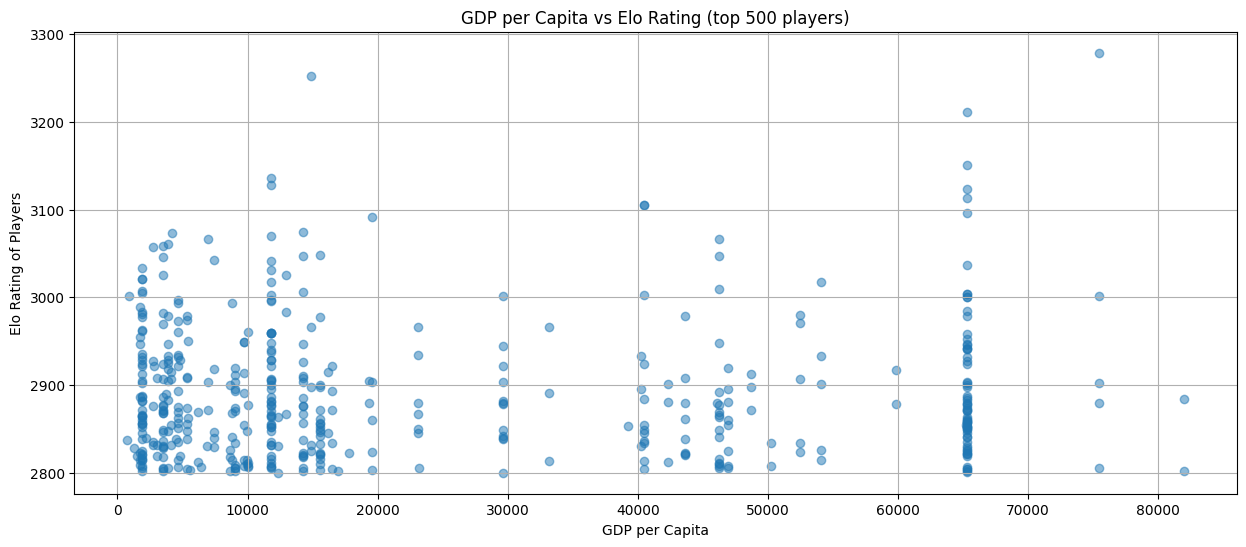

Pearson's correlation coefficient: 0.04335564315217812
Pearson's correlation coefficient (top 100K): 0.03030605760847761


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


economic_data = pd.read_csv('economics.csv')

economic_data['GDP'] = economic_data['GDP'].replace('[\$,]', '', regex=True).astype(float)
economic_data['Population'] = economic_data['Population'].replace('[\$,]', '', regex=True).astype(float)
economic_data['GDP_per_capita'] = (economic_data['GDP'] / economic_data['Population'])

chess_data = pd.read_csv('chess.csv')

merged_data = pd.merge(chess_data, economic_data, left_on='country', right_on='Country', how='left')

top_1000_players = merged_data.nlargest(500, 'rate')

top_1000_players = top_1000_players.dropna(subset=['GDP_per_capita', 'rate'])

elo_ratings = top_1000_players['rate']

plt.figure(figsize=(15, 6))
plt.scatter(top_1000_players['GDP_per_capita'], elo_ratings, alpha=0.5)
plt.xlabel('GDP per Capita')
plt.ylabel('Elo Rating of Players')
plt.title('GDP per Capita vs Elo Rating (top 500 players)')
plt.grid(True)
plt.show()

correlation_coefficient, p_value = pearsonr(top_1000_players['GDP_per_capita'], elo_ratings)
print("Pearson's correlation coefficient:", correlation_coefficient)


top_100000_players = merged_data.nlargest(100000, 'rate')

top_100000_players = top_100000_players.dropna(subset=['GDP_per_capita', 'rate'])
correlation_coefficient, p_value = pearsonr(top_100000_players['GDP_per_capita'], top_100000_players['rate'])
print("Pearson's correlation coefficient (top 100K):", correlation_coefficient)

